In [1]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


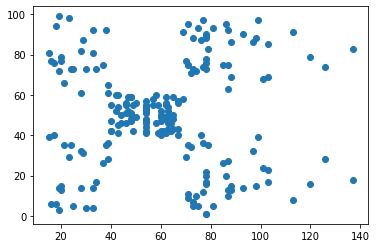

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

In [39]:
import random
import numpy as np

def kmeans(x, y, num_clusters):
    
    # Random centroid initialization
    centroids_x = random.sample(list(x), num_clusters)
    centroids_y = random.sample(list(y), num_clusters)
    centroids = list(zip(centroids_x, centroids_y))

    while True:
        # Assign data points to their respective clusters based on the closest centroid
        clusters = {}
        for i in range(num_clusters):
            cluster_name = f'Cluster {i+1}'
            clusters[cluster_name] = []
        for x_i, y_i in zip(x, y):
            closest_centroid = centroids[np.argmin([np.sqrt((x_i-c[0])**2 + (y_i-c[1])**2) for c in centroids])]
            closest_centroid_index = centroids.index(closest_centroid)
            clusters[f'Cluster {closest_centroid_index+1}'].append((x_i, y_i))
        
        # Compute the mean of each cluster and update the centroids
        new_centroids = []
        for cluster in clusters.values():
            if cluster:
                new_centroids.append((np.mean([c[0] for c in cluster]), np.mean([c[1] for c in cluster])))
            else:
                # If a cluster has no points, keep the previous centroid
                new_centroids.append(centroids[clusters.values().index(cluster)])
        
        # If the centroids have not moved, the algorithm has converged
        if set(new_centroids) == set(centroids):
            break
        centroids = new_centroids

    return clusters

In [40]:
clusters = kmeans(df['Annual Income (k$)'],df['Spending Score (1-100)'],5)

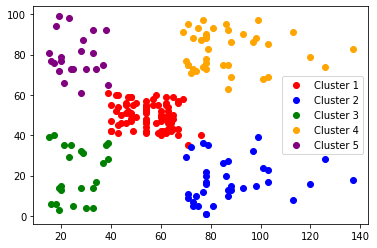

In [46]:
fig, ax = plt.subplots()

colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, cluster in enumerate(clusters):
    x, y = zip(*clusters[cluster])
    ax.scatter(x, y, c=colors[i], label=cluster)

ax.legend()
plt.show()